In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
obj2=pd.DataFrame({})
obj3=pd.DataFrame({})
obj7=pd.DataFrame({})
periods=['3b','3c','3d','2016Q1','2016Q2','2016Q3','2016Q4','2017Q1','2017Q2','2017Q3','2017Q4','2018Q2']
base_url='E:\practice\LoanStats'
for period in periods:
    obj=pd.read_csv(base_url+period+'.csv',low_memory=False)
    obj['int_rate']=obj['int_rate'].str.replace(r'%', r'').astype('float')/100.0
    obj['issue_d']=pd.to_datetime(obj['issue_d'],format='%b-%y')
    obj2=obj2.append(obj.groupby([obj['issue_d'].dt.year,obj['grade']])['loan_amnt'].agg(['sum']))
periods=['3a','2018Q1']
for period in periods:
    obj=pd.read_csv(base_url+period+'.csv',low_memory=False)
    obj['int_rate']=obj['int_rate'].str.replace(r'%', r'').astype('float')/100.0
    obj['issue_d']=obj['issue_d'].str.zfill(6)
    obj['issue_d']=pd.to_datetime(obj['issue_d'],format='%y-%b')
    obj2=obj2.append(obj.groupby([obj['issue_d'].dt.year,obj['grade']])['loan_amnt'].agg(['sum']))

In [4]:
obj3=obj2.groupby(['issue_d','grade'])['sum'].agg(['sum'])
obj3

sum
issue_d grade              
2007.0  A      3.912000e+05
        B      8.171000e+05
        C      1.166875e+06
        D      7.925500e+05
        E      8.138250e+05
        F      6.162500e+05
        G      3.796750e+05
2008.0  A      1.982575e+06
        B      5.449775e+06
        C      5.127250e+06
        D      3.759325e+06
        E      2.561825e+06
        F      1.236275e+06
        G      1.002225e+06
2009.0  A      8.700675e+06
        B      1.569548e+07
        C      1.318242e+07
        D      8.700125e+06
        E      3.665175e+06
        F      1.328225e+06
        G      6.561500e+05
2010.0  A      2.482435e+07
        B      4.025332e+07
        C      2.744788e+07
        D      2.070800e+07
        E      1.179192e+07
        F      4.570050e+06
        G      2.397025e+06
2011.0  A      5.165730e+07
        B      7.465610e+07
...                     ...
2014.0  F      1.042984e+08
        G      3.328038e+07
2015.0  A      1.077445e+09
        B      1.676098e+09
        C      1.777832e+09
        D      9.991548e+08
        E      6.455848e+08
        F      1.972262e+08
        G      4.426712e+07
2016.0  A      1.013587e+09
        B      1.802761e+09
        C      1.941540e+09
        D      9.497770e+08
        E      4.639027e+08
        F      1.792614e+08
        G      4.974080e+07
2017.0  A      1.096915e+09
        B      1.839662e+09
        C      2.224924e+09
        D      8.918868e+08
        E      3.406517e+08
        F      1.186084e+08
        G      7.230885e+07
2018.0  A      8.028149e+08
        B      9.840201e+08
        C      9.147723e+08
        D      4.757661e+08
        E      1.171645e+08
        F      2.826678e+07
        G      5.580825e+06

[84 rows x 1 columns]

In [5]:
obj4=obj3.reset_index()

In [7]:
pivot_df = obj4.pivot(index='issue_d', columns='grade', values='sum').fillna(0)

In [11]:
pivot_df

grade,A,B,C,D,E,F,G
issue_d,,,,,,,
2007.0,3.912000e+05,8.171000e+05,1.166875e+06,792550.0,813825.0,616250.0,379675.0
2008.0,1.982575e+06,5.449775e+06,5.127250e+06,3759325.0,2561825.0,1236275.0,1002225.0
2009.0,8.700675e+06,1.569548e+07,1.318242e+07,8700125.0,3665175.0,1328225.0,656150.0
2010.0,2.482435e+07,4.025332e+07,2.744788e+07,20708000.0,11791925.0,4570050.0,2397025.0
2011.0,5.165730e+07,7.465610e+07,4.809940e+07,37321675.0,31071225.0,14562175.0,4315950.0
2012.0,1.214769e+08,2.196682e+08,1.534190e+08,113862325.0,70276075.0,32853525.0,6855025.0
2013.0,2.707844e+08,5.958985e+08,5.670914e+08,283641225.0,161329875.0,84437275.0,19582625.0
2014.0,5.234128e+08,8.442924e+08,9.635428e+08,689507475.0,345506050.0,104298375.0,33280375.0
2015.0,1.077445e+09,1.676098e+09,1.777832e+09,999154850.0,645584850.0,197226225.0,44267125.0


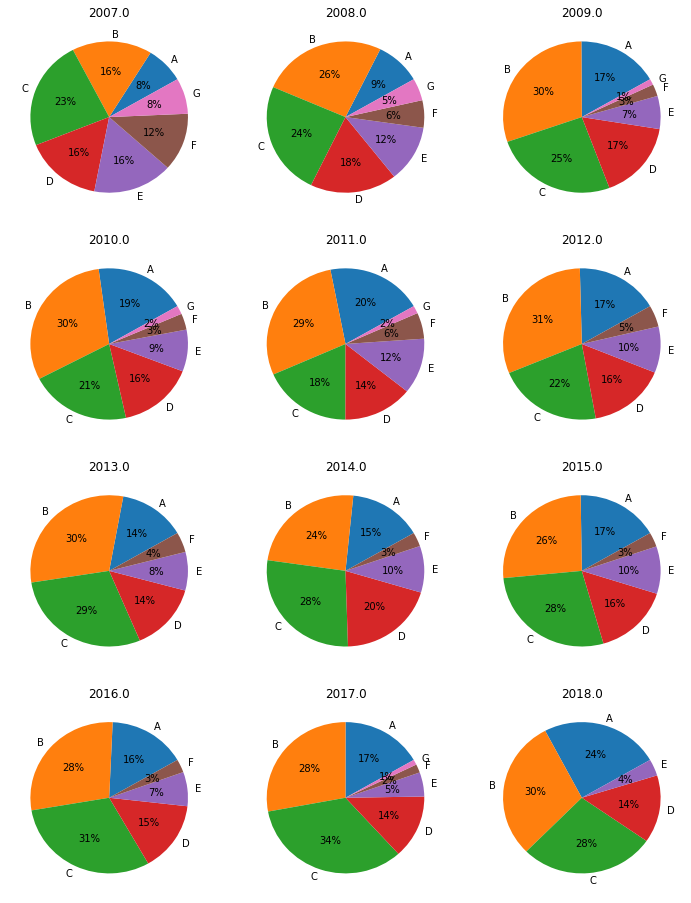

In [33]:
fig, axes = plt.subplots(4, 3, figsize=(12, 16))

for i, (idx, row) in enumerate(pivot_df.iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30,autopct='%1.0f%%')
    ax.set_title(idx)

fig.subplots_adjust(wspace=.2)


Text(0,0.5,'Amount of loans')

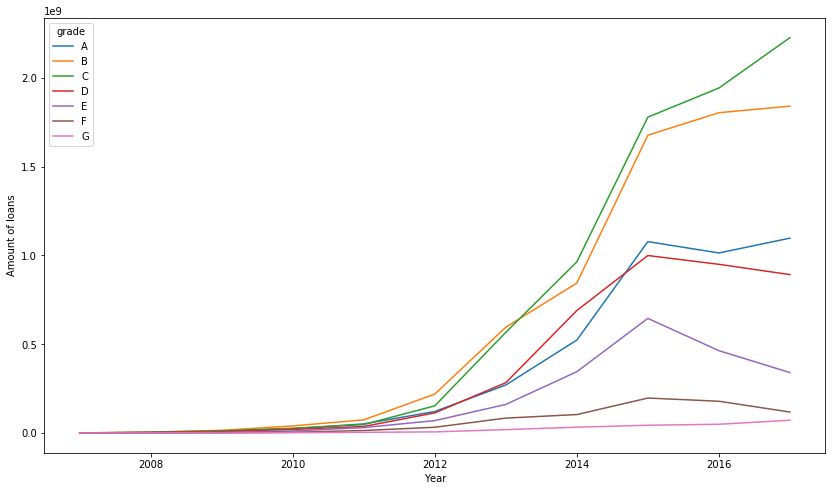

In [47]:
ax=pivot_df.iloc[0:11].plot(kind='line',figsize=(14, 8))
ax.set_xlabel('Year')
ax.set_ylabel('Amount of loans')

In [ ]:
# As we can see, the amount of loans borrowed by people with grade lower than D has been decreasing in recent years while 
# borrowing for people with grade B and D has been increasing gradually. This could be due to stricter policies and it can
# be used to explained why average interest rates are decreasing as well. We can predict the trend might continue and people
# with low credit grade might need to find other sources to borrow money.